# 의사결정나무 과제

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/Concrete.csv")
df_raw.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### concrete 데이터를 불러왔습니다.

In [3]:
df_raw.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


#### describe를 통하여 각 변수별로 기술통계량을 확인해주었습니다. 

<Axes: >

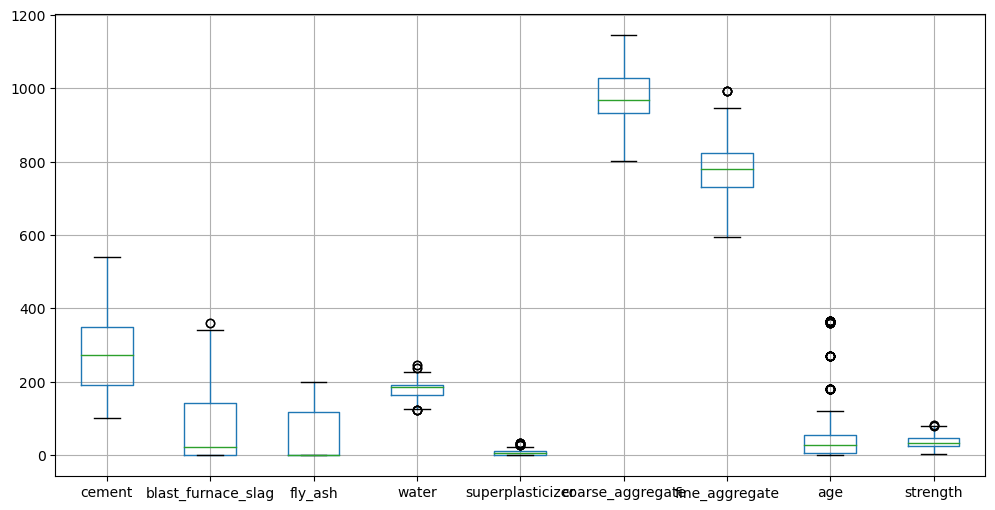

In [4]:
df_raw.boxplot(figsize=(12,6))

#### 각 변수의 boxplot을 그려보았습니다. water변수가 이상치가 있다고 판단되지만, 이번 과제에서는 이상치 처리없이 의사결정나무 모델 구축을 진행해보았습니다.

In [5]:
df_raw.isnull().sum() 

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
strength              0
dtype: int64

#### 각 변수별로 결측치를 확인하였을 때, 결측치는 하나도 없다는 것을 확인하였습니다.

In [6]:
df_raw_y=df_raw["strength"]
df_raw_x=df_raw.drop("strength", axis=1, inplace=False)

In [7]:
df_train_x,df_test_x,df_train_y,df_test_y= train_test_split(df_raw_x, df_raw_y
                                                            , test_size=0.4, random_state=6659)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(618, 8)
train data Y size:(618,)
test data X size:(412, 8)
test data Y size:(412,)


In [8]:
tree_uncustomized=DecisionTreeRegressor(random_state=6659)
tree_uncustomized.fit(df_train_x,df_train_y)

print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Score on testing set: {:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))


Score on training set: 0.997
Score on testing set: 0.805


#### 모델을 생성해주었습니다. 모델 설명력이 train은 99.7%, test 80.5%로 모델이 train 데이터에 과적합 위험이 존재합니다.

In [9]:
tree_uncustomized.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 6659,
 'splitter': 'best'}

#### 현재 생성된 Tree 모델의 옵션을 확인하였을 때, min_samples_leaf가 1로 된 것을 확인하였습니다. 과적합 위험이 있어 다시 돌려줄 것입니다.

In [10]:
train_score=[]; test_score=[]
para_leaf=[n_leaf for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf :
    tree= DecisionTreeRegressor(random_state=6659, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))

#### min_samples_leaf의 잎사귀 노드의 최소 자료 수를 for문을 통해 1~20번을 순차적으로 돌려보았습니다.

In [11]:
df_score_leaf= pd.DataFrame()
df_score_leaf["MinSamplesLeaf"]=para_leaf
df_score_leaf["TrainScore"]= train_score
df_score_leaf["TestScore"]=test_score

#### 데이터 프레임을 만들고 leaf의 파라미터별로 train, test의 score를 확인해주었습니다.

In [12]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.997,0.805
1,2,0.978,0.813
2,3,0.955,0.826
3,4,0.932,0.821
4,5,0.918,0.823
5,6,0.904,0.824
6,7,0.889,0.819
7,8,0.881,0.812
8,9,0.870,0.801
9,10,0.859,0.774


#### Test 스코어가 가장 크면서 과적합이 아니라고 판단되는 min_samples_leaf = 8를 선정해주었습니다.

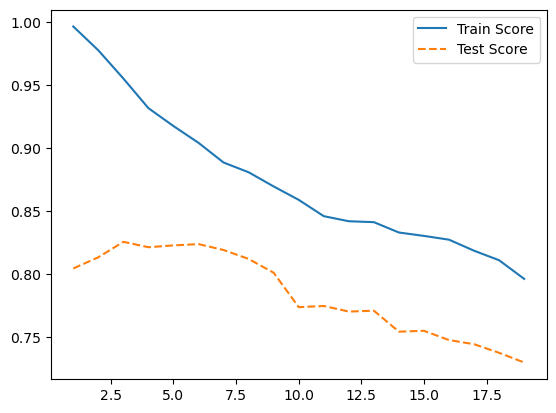

In [13]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.legend()
plt.show()

#### plt.plot을 통해서 leaf 파라미터별로 train, test 스코어를 확인해주었습니다.

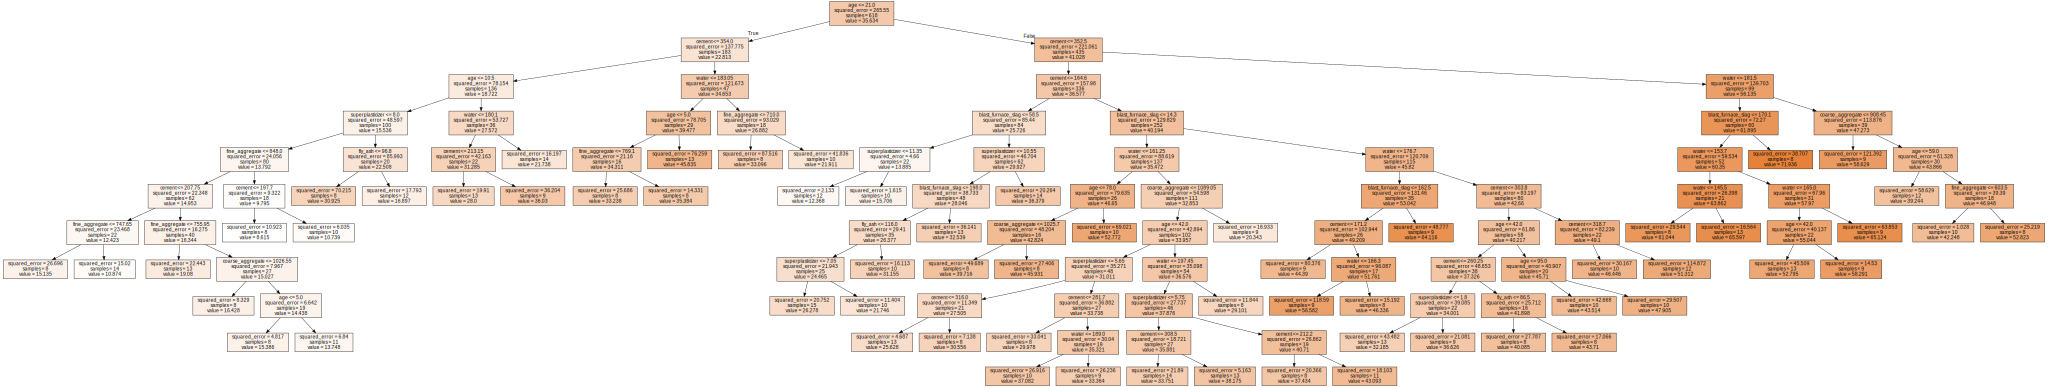

In [14]:
v_feature_name= df_train_x.columns
tree_graph = DecisionTreeRegressor(random_state=6659, min_samples_leaf=8)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot", feature_names= v_feature_name, impurity=True, filled=True)
with open("tree_leaf.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

#### min_samples_leaf= 8 일 때 전체 트리 구조와 조건문이 쓰인 개수를 확인할 수 있었습니다.

In [17]:
train_score=[]; test_score=[]
para_split=[n_split*2 for n_split in range(2,20)]

for v_min_samples_split in para_split :
    tree= DecisionTreeRegressor(random_state=6659, min_samples_leaf=8,min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))

In [18]:
df_score_split= pd.DataFrame()
df_score_split["MinSamplesSplit"]=para_split
df_score_split["TrainScore"]= train_score
df_score_split["TestScore"]=test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.881,0.812
1,6,0.881,0.812
2,8,0.881,0.812
3,10,0.881,0.812
4,12,0.881,0.812
5,14,0.881,0.812
6,16,0.881,0.812
7,18,0.877,0.803
8,20,0.869,0.793
9,22,0.861,0.783


#### 2~20까지 for문을 돌려 n_split*2 에  맞는  min_samples_split값에 따른 train, test score를 확인해주었습니다. 0.891과 0.792가 반복되는 지점을 빼고,  그 다음 값인 18을 지정해주었습니다.

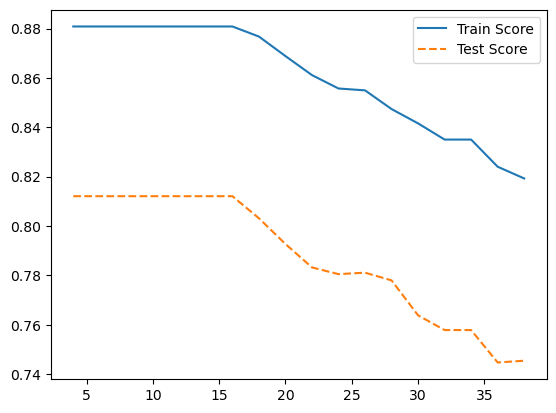

In [19]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.legend()
plt.show()

#### min_samples_split 값은  약 18까지 같은 성능이 반복되고 , 꺾이는 구간인 22를 선정하였습니다. 

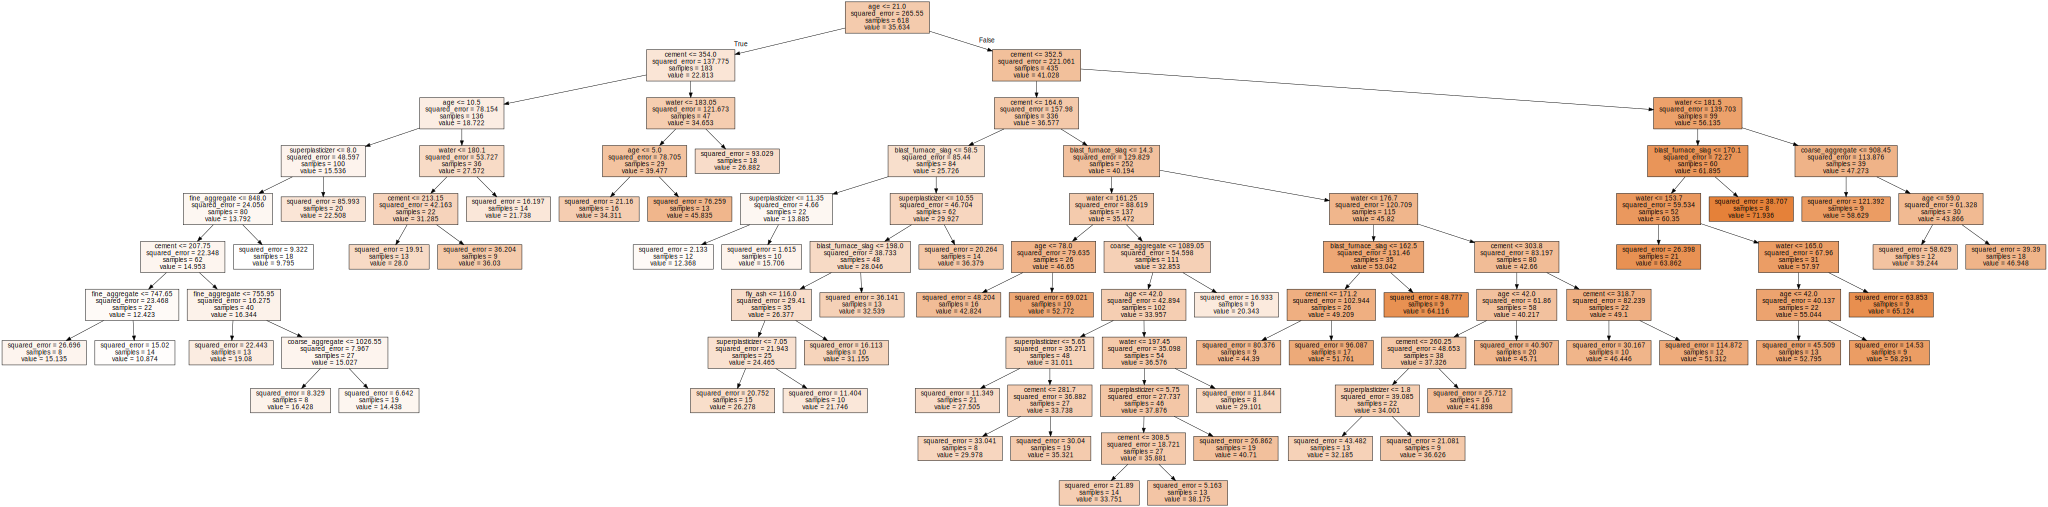

In [20]:
tree_graph = DecisionTreeRegressor(random_state=6659, min_samples_leaf=8, min_samples_split=22)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot", feature_names= v_feature_name, impurity=True, filled=True)
with open("tree_leaf.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

#### min_samples_split=22 추가해서 전체 tree 구조를 한번 더 확인해주었습니다.

In [21]:
train_score=[]; test_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth :
    tree= DecisionTreeRegressor(random_state=6659, min_samples_leaf=8,min_samples_split=22, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))

In [22]:
df_score_depth= pd.DataFrame()
df_score_depth["depth"]=para_depth
df_score_depth["TrainScore"]= train_score
df_score_depth["TestScore"]=test_score

In [23]:
df_score_depth.round(3)

,depth,TrainScore,TestScore
0,1,0.260,0.229
1,2,0.493,0.471
2,3,0.638,0.599
3,4,0.737,0.675
4,5,0.792,0.725
5,6,0.829,0.760
6,7,0.847,0.774
7,8,0.857,0.777
8,9,0.860,0.782
9,10,0.861,0.783


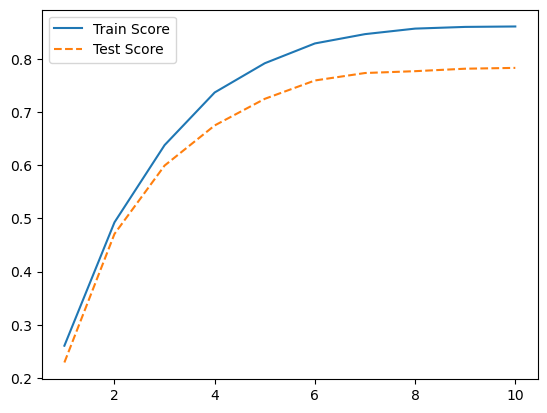

In [24]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.legend()
plt.show()

#### max_depth는 값이 커질수록 높게 나왔고, 6이 적당한 값이라고 판단하여서 max_depth은 6을 선정하였습니다.

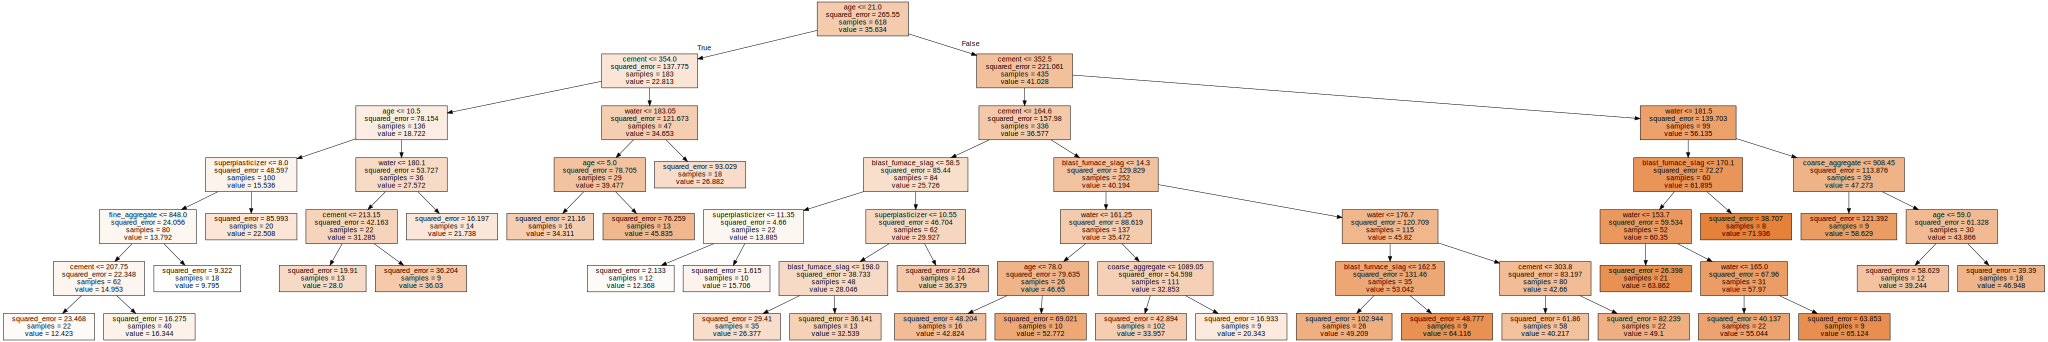

In [25]:
tree_graph = DecisionTreeRegressor(random_state=6659, min_samples_leaf=8, min_samples_split=22, max_depth=6)
tree_graph.fit(df_train_x,df_train_y)

export_graphviz(tree_graph, out_file="tree_leaf.dot", feature_names= v_feature_name, impurity=True, filled=True)
with open("tree_leaf.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

#### max_depth =6 을 추가한 뒤 전체 tree 구조를 시각화하였습니다. 

# 최종 모델

In [26]:
v_feature_name=df_train_x.columns
tree_final= DecisionTreeRegressor(min_samples_leaf=8, min_samples_split=22,max_depth=6, random_state=6659,)
tree_final.fit(df_train_x, df_train_y)


DecisionTreeRegressor(max_depth=6, min_samples_leaf=8, min_samples_split=22,
                      random_state=6659)

In [27]:
tree_final.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 8,
 'min_samples_split': 22,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 6659,
 'splitter': 'best'}

In [33]:
print("Score on training set: {:.3f}".format(tree_final.score(df_train_x,df_train_y)))
print("Score on testing set: {:.3f}".format(tree_final.score(df_test_x,df_test_y)))

Score on training set: 0.829
Score on testing set: 0.760


#### 최종모델을 구축하여주고, 모델의 파라미터값을 확인해주었습니다.  최종 모델의 test score = 76%입니다. 모델의 성능은 낮기 때문에 모델을 어딘가에 사용하기에는 부적합하다고 판단됩니다. 제조업 기준에서는 81%성능은 넘어야합니다. 다른 파라미터나 데이터 전처리의 변화 등 여러가지 작업을 통해 모델의 성능을 향상시킬 수 있을 것이라고 판단됩니다.

In [34]:
test_pred= tree_final.predict(df_test_x)
pd.DataFrame({'실제값':df_test_y,'예측값':test_pred}).reset_index(drop=True)

,실제값,예측값
0,36.15,33.957059
1,78.80,55.043636
2,71.30,71.936250
3,65.91,58.628889
4,16.88,28.000000
...,...,...
407,44.28,40.216897
408,15.62,16.344500
409,52.01,45.834615
410,43.38,32.539231


#### 실제값과 예측값을 각각 비교해주었습니다. 크게 예측이 많이 벗어난 값은 별로 없었습니다.

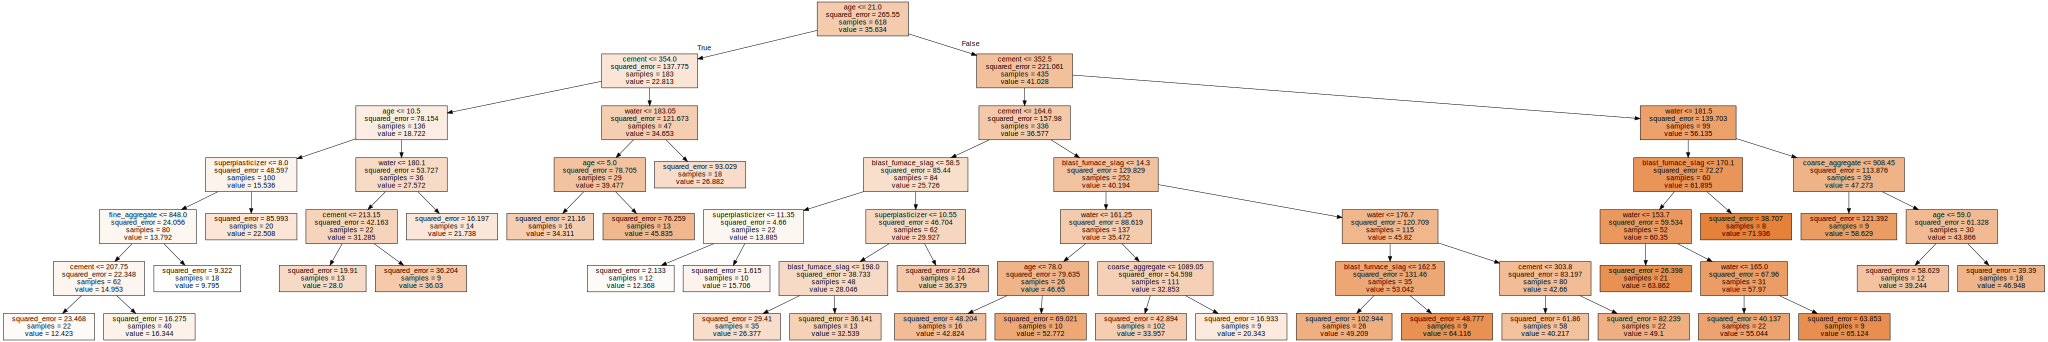

In [35]:
export_graphviz(tree_graph, out_file="tree_leaf.dot", feature_names= v_feature_name, impurity=True, filled=True)
with open("tree_leaf.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

#### 최종모델의 전체 tree 구조를 시각화해주고, 조건도 확인해주었습니다. 시멘트 강도가 가장 큰 값은 71.936이였다.  최초에 age <= 21이  False, cement<=352.5 , water <=181.5, blast_furnace_slag<=170.1로 나누어져서 squared_error가 38.07일때의 조건을 가질 때가 가장 컸다. 전체 트리 구조를 통해 확인할 수 있었다. 

In [36]:
df_importance=pd.DataFrame()
df_importance["Feature"]= v_feature_name
df_importance["importance"]= tree_final.feature_importances_

In [37]:
df_importance.sort_values("importance",ascending=False, inplace= True)
df_importance.round(3)

,Feature,importance
0,cement,0.390
7,age,0.357
3,water,0.113
1,blast_furnace_slag,0.100
5,coarse_aggregate,0.022
4,superplasticizer,0.015
6,fine_aggregate,0.003
2,fly_ash,0.000


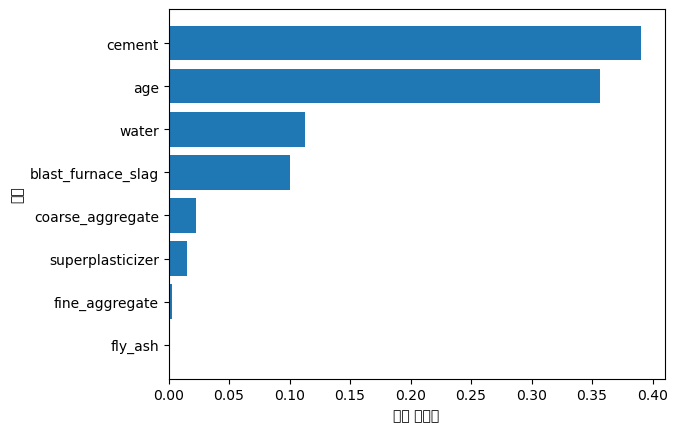

In [38]:
df_importance.sort_values("importance",ascending=True, inplace= True) 
coordinates= range(len(df_importance))
plt.barh(y= coordinates, width= df_importance["importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")
plt.show()

#### 변수 중요도를 확인하였습니다. 책에서 보았던 예시처럼 한 변수가 압도적이지 않고, blast_furnace_slag이 0.293으로 가장 높고, 순차적으로 strength, fly_ash, fine_aggregae, water, superplasticizer, age 로 거의 water까지 5개의 변수로 전체의 90% 이상 설명가능하다고 판단하였습니다.

# 랜덤 포레스트 과제

In [39]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

In [40]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/Concrete.csv")
df_raw.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### Concrete 데이터를 불러와주었습니다.

In [41]:
df_raw.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


#### Concrete 데이터의 기술통계량을 확인해주었습니다. 

In [42]:
df_raw.boxplot(figsize=(12,6))

<Axes: >

#### boxplot을 그려서 이상치의 분포를 확인해주었지만 따로 이상치 처리는 해주지 않았습니다.

In [43]:
df_raw.isnull().sum() 

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
strength              0
dtype: int64

#### 결측치를 변수별로 확인해주었지만 결측치는 존재하지 않음을 확인하였습니다.

In [44]:
df_raw_y=df_raw["strength"]
df_raw_x=df_raw.drop("strength", axis=1, inplace=False)

In [49]:
df_train_x,df_test_x,df_train_y,df_test_y= train_test_split(df_raw_x, df_raw_y
                                                            , test_size=0.4, random_state=6659)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(618, 8)
train data Y size:(618,)
test data X size:(412, 8)
test data Y size:(412,)


#### 데이터를 6:4 비율로 train 과 test로 나눠주었습니다.

In [50]:
rf_uncustomized = RandomForestRegressor(random_state=6659)
rf_uncustomized.fit(df_train_x,df_train_y)

print("Score on training set:{:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))

print("Score on test set:{:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.981
Score on test set:0.886


In [51]:
rf_uncustomized.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 6659,
 'verbose': 0,
 'warm_start': False}

#### 랜덤 포레스트 모델을 난수만 부여하고, 돌려보았고, min_samples_leaf이 1이므로 과적합 위험이 있다. 그럼에도 training 데이터가 1이 아닌 이유는 목표변수를 제외한 나머지 설명변수가 모두 같지만 목표변수의 값이 달라 잔차가 발생하여 1이 아닌 0.989가 나온 것을 알 수 있었습니다.

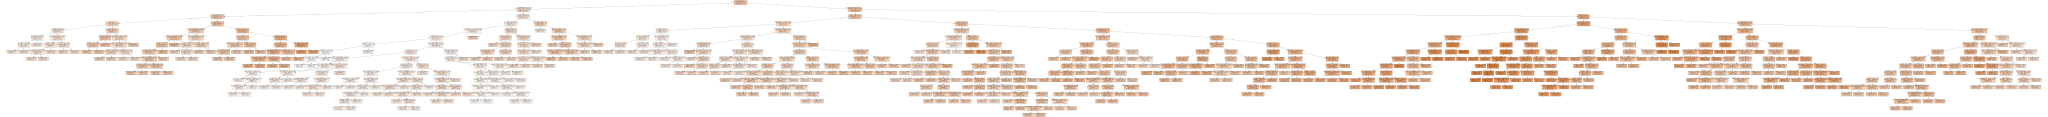

In [52]:
export_graphviz(rf_uncustomized[0], out_file="rfr_uncustomized_0.dot", feature_names= v_feature_name, impurity=True, filled=True)
with open("rfr_uncustomized_0.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

#### 랜덤 포레스트를 구축하고, 전체 Tree 중에 첫 번째 Tree의 구조를 보았습니다.

In [53]:
train_score=[]; test_score=[]
para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree :
    rf= RandomForestRegressor(n_estimators=v_n_estimators,random_state=6659)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

In [54]:
df_score_n= pd.DataFrame()
df_score_n["n_estimators"]=para_n_tree
df_score_n["TrainScore"]= train_score
df_score_n["TestScore"]=test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.975,0.869
1,20,0.979,0.881
2,30,0.980,0.885
3,40,0.981,0.885
4,50,0.981,0.886
5,60,0.981,0.887
6,70,0.981,0.887
7,80,0.981,0.887
8,90,0.981,0.887
9,100,0.981,0.886


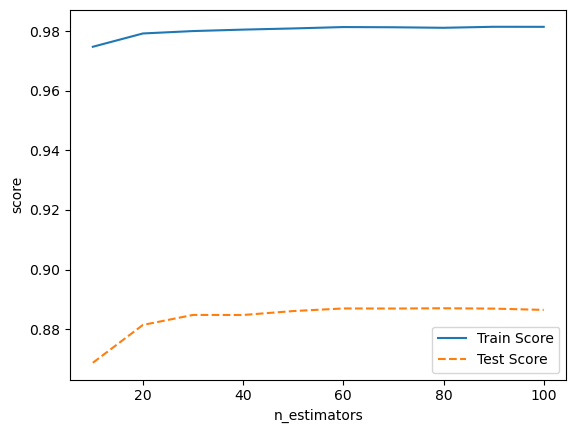

In [57]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()
plt.show()

#### n_estimator를 10,20,30,40 -- 110번까지 돌리고 최적 모델을 찾기 위해 모델을 돌리고 각각의 설명력을 보기 위해 데이터 프레임으로 score를 비교해주고, 시각화하여 그래프도 보았습니다. n_estimator=20을 선택해주었습니다.

In [58]:
estimator= RandomForestRegressor(random_state=6659)
para_depth=[depth for depth in range(1,11)]
para_leaf=[n_leaf for n_leaf in range(1,21)]
para_split=[n_split*2 for n_split in range(2,21)]

param_grid={"max_depth":para_depth,"min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_rf=GridSearchCV(estimator,param_grid,scoring="r2", n_jobs= -1)
grid_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter:\n{}".format(grid_rf.best_params_))
print("\nbest score:\n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
RandomForestRegressor(max_depth=10, min_samples_split=4, random_state=6659)

best parameter:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4}

best score:
0.87


#### 의사결정나무 파라미터 최적을 구축할 때는 for문을 통해 min_samples_leaf, min_samples_split, max_depth을 각각 넣어서 성능을 비교하고, 직접 파라미터를 결정하였습니다. 랜덤 포레스트의 모형을 구축할 때는 다른 방법을 연습해보기 위해서 GridSearch를 통하여 파라미터 최적화를 하는 연습을 해보았습니다. param_grid에는 각각 리스트 컴프리헨션을 통해서 확인해보고자 하는 값들을 넣어주고 돌려주었습니다.

#### n_estimators도 GridSearch를 통해 구하려고 하였지만, 돌아가는 시간을 알 수 없어, 실습때 사용했던 3가지 파라미터만 GridSearch로 구하였습니다. 

In [59]:
rf_final= RandomForestRegressor(n_estimators=20,random_state=6659, min_samples_leaf=1, min_samples_split=4, max_depth=10)
rf_final.fit(df_train_x,df_train_y)

print("Score on training set:{:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.981
Score on test set:0.886


#### 최종 모델의 성능을 확인하였을 때 Training이 98.1%, test 성능이 88.6% 로 최종 모델이 과적합이 있다고 판단됩니다. 파라미터를 변화시키고, 추후에 가지치기와 같은 작업들 통하여 과적합을 방지하면서 모델의 성능을 향상시킬 수 있는 방법이 있다고 생각됩니다. 확실히 과적합인지 판단 후 모델을 사용할 수 있을지 없을지 판단해야될 것 같습니다.

# 그랜디언트 부스팅

In [63]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib


from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV

In [64]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/Concrete.csv")
df_raw.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [65]:
df_raw_y=df_raw["strength"]
df_raw_x=df_raw.drop("strength", axis=1, inplace=False)

In [66]:
df_train_x,df_test_x,df_train_y,df_test_y= train_test_split(df_raw_x, df_raw_y
                                                            , test_size=0.4, random_state=6659)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(618, 8)
train data Y size:(618,)
test data X size:(412, 8)
test data Y size:(412,)


#### Concrete 데이터를 불러와서 head()를 통해 데이터를 확인해주고, train과 test 데이터로 6:4 비율로 나누어주었습니다.

In [67]:
gb_uncustomized = GradientBoostingRegressor(random_state=6659)
gb_uncustomized.fit(df_train_x,df_train_y)

print("Score on training set:{:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.952
Score on test set:0.893


In [68]:
gb_uncustomized.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 6659,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

#### 그래디언트 부스팅 모델을 한번 돌려보고, 파라미터값들을 확인해주었습니다. min_samples_leaf=1 로 과적합이 의심됩니다.

In [69]:
train_score=[]; test_score=[]
para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree :
    gb= GradientBoostingRegressor(n_estimators=v_n_estimators,random_state=6659)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

In [70]:
df_score_n= pd.DataFrame()
df_score_n["n_estimators"]=para_n_tree
df_score_n["TrainScore"]= train_score
df_score_n["TestScore"]=test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.637,0.608
1,20,0.805,0.762
2,30,0.868,0.818
3,40,0.898,0.848
4,50,0.916,0.865
5,60,0.929,0.874
6,70,0.936,0.880
7,80,0.944,0.885
8,90,0.947,0.888
9,100,0.952,0.893


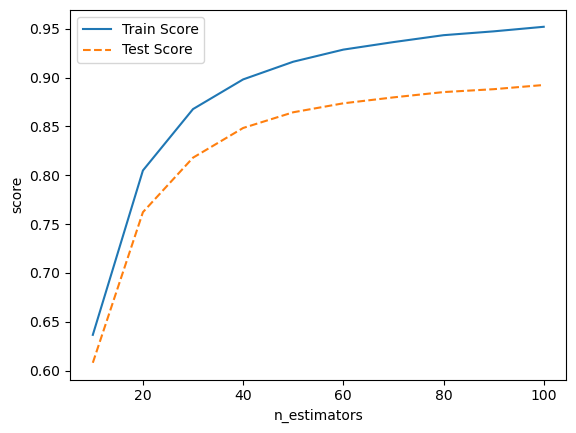

In [71]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()
plt.show()

#### n_estimator를 10,20,30,40 -- 110번까지 돌리고 최적 모델을 찾기 위해 모델을 돌리고 각각의 설명력을 보기 위해 데이터 프레임으로 score를 비교해주고, 시각화하여 그래프도 보았습니다. n이 커질수록 잔차를 줄이고 학습하기 때문에 갈수록 성능은 올라가는 것을 볼 수 있었습니다.  n_estimators=40으로 정하였습니다.

In [72]:
train_score=[]; test_score=[]
para_leaf=[n_leaf for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf :
    gb= GradientBoostingRegressor(n_estimators=40,random_state=6659, min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

In [73]:
df_score_leaf= pd.DataFrame()
df_score_leaf["MinSampleLeaf"] =para_leaf
df_score_leaf["TrainScore"]= train_score
df_score_leaf["TestScore"]=test_score
df_score_leaf.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,1,0.898,0.848
1,2,0.901,0.851
2,3,0.902,0.854
3,4,0.902,0.856
4,5,0.901,0.855
5,6,0.899,0.851
6,7,0.899,0.854
7,8,0.896,0.851
8,9,0.898,0.848
9,10,0.897,0.850


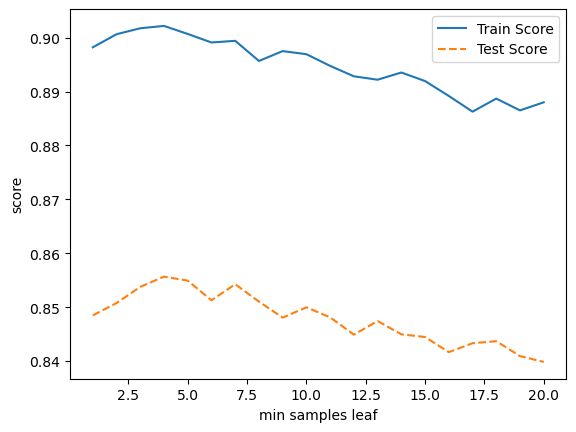

In [74]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()
plt.show()

#### MinSampleLeaf을 1부터 20까지 돌려보았을 때, Train과 Test사이에 성능이 0.05 정도 차이가 있다고 판단됩니다.그나마 그래프에서 수치가 약간 높아지는 7을 선정해주었습니다.

In [78]:
train_score=[]; test_score=[]
para_split=[n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split :
    gb= GradientBoostingRegressor(n_estimators=40,random_state=6659, min_samples_leaf=7, min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

In [79]:
df_score_leaf= pd.DataFrame()
df_score_leaf["MinSampleSplit"] =para_split
df_score_leaf["TrainScore"]= train_score
df_score_leaf["TestScore"]=test_score
df_score_leaf.round(3)

,MinSampleSplit,TrainScore,TestScore
0,4,0.899,0.854
1,6,0.899,0.854
2,8,0.899,0.854
3,10,0.899,0.854
4,12,0.899,0.854
5,14,0.899,0.854
6,16,0.899,0.852
7,18,0.899,0.852
8,20,0.899,0.852
9,22,0.896,0.852


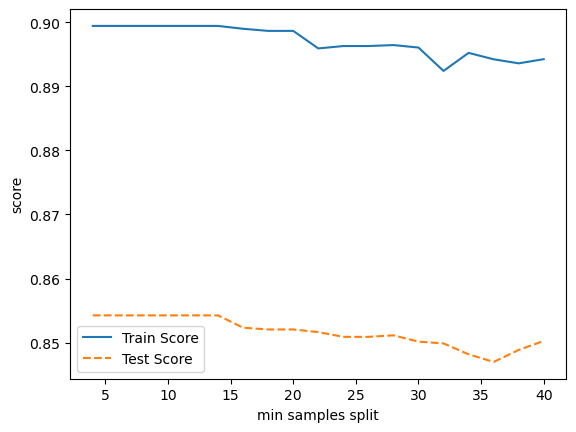

In [80]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()
plt.show()

#### for문을 사용하여 min_samples_split 값을 4,6,8,10---, 40 까지 돌려주었습니다. 이또한 Train과 test 사이에 0.05정도 차이가 나는 것을 육안으로 확인하였습니다. MinSampleSplit은 거의 모두 차이가 미비하기에 22로 선정하겠습니다.

In [81]:
train_score=[]; test_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth :
    gb= GradientBoostingRegressor(n_estimators=40,random_state=6659, min_samples_leaf=7, min_samples_split=22, max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

In [82]:
df_score_depth= pd.DataFrame()
df_score_depth["depth"]=para_depth
df_score_depth["TrainScore"]= train_score
df_score_depth["TestScore"]=test_score
df_score_depth.round(3)

,depth,TrainScore,TestScore
0,1,0.665,0.629
1,2,0.836,0.788
2,3,0.896,0.852
3,4,0.938,0.878
4,5,0.959,0.888
5,6,0.968,0.894
6,7,0.973,0.896
7,8,0.977,0.898
8,9,0.977,0.894
9,10,0.979,0.897


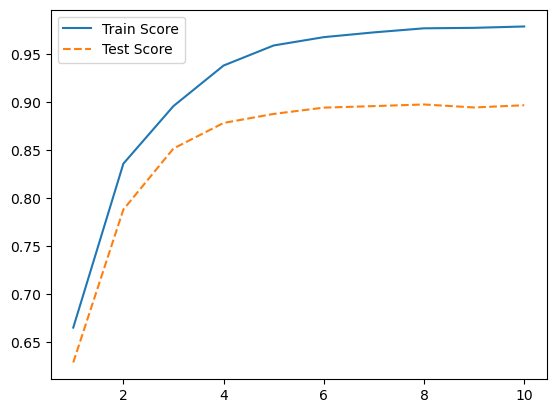

In [83]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.legend()
plt.show()

#### 1부터 시작해서 급격하게 올라가고 있으며 max_depth = 5 부터 큰 차이가 없기에 5를 선정하였습니다.

In [85]:
train_score=[]; test_score=[]
para_lr=[lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr :
    gb= GradientBoostingRegressor(n_estimators=30,random_state=6659, min_samples_leaf=11, min_samples_split=22, max_depth=5,learning_rate=v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

In [86]:
df_score_lr= pd.DataFrame()
df_score_lr["LearningRate"]=para_lr
df_score_lr["TrainScore"]= train_score
df_score_lr["TestScore"]=test_score
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.939,0.869
1,0.2,0.967,0.907
2,0.3,0.974,0.910
3,0.4,0.978,0.922
4,0.5,0.980,0.916
5,0.6,0.982,0.918
6,0.7,0.985,0.907
7,0.8,0.983,0.900
8,0.9,0.985,0.880


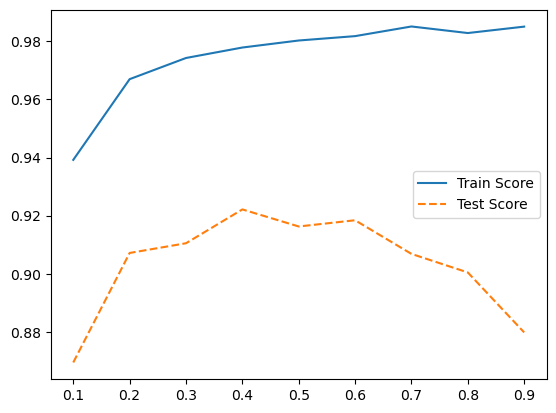

In [87]:
plt.plot(para_lr, train_score, linestyle="-", label="Train Score")
plt.plot(para_lr, test_score, linestyle="--", label="Test Score")
plt.legend()
plt.show()

#### Test 성능이 가장 높은 학습율은 0.4를 지정해주었습니다.

In [88]:
gb_final= GradientBoostingRegressor(n_estimators=30,random_state=6659, min_samples_leaf=11, min_samples_split=22, max_depth=4,learning_rate=0.4)
gb_final.fit(df_train_x,df_train_y)

print("Score on training set:{:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.952
Score on test set:0.893


#### 최종 모델은 Training score 95.2%, Test score 89.3% 입니다. 추가적인 파라미터 조정을 통한 성능 개선을 할 수 있다고 판단하고, 과적합 위험이 있는지 한 번 더 확인하고 없다면 사용하기에 매우 휼룡하다고 판단됩니다.

In [89]:
test_pred=gb_final.predict(df_test_x)

In [90]:
pd.DataFrame({'실제값':df_test_y,'예측값':test_pred}).reset_index(drop=True)

,실제값,예측값
0,36.15,36.426299
1,78.80,59.178402
2,71.30,69.628540
3,65.91,56.808839
4,16.88,27.036441
...,...,...
407,44.28,44.642154
408,15.62,16.480379
409,52.01,37.350064
410,43.38,36.170697


In [91]:
v_feature_name= df_train_x.columns

In [92]:
df_importance=pd.DataFrame()
df_importance["Feature"]= v_feature_name
df_importance["importance"]= gb_final.feature_importances_

In [93]:
df_importance.sort_values("importance",ascending=False, inplace= True)
df_importance.round(3)

,Feature,importance
7,age,0.354
0,cement,0.330
3,water,0.094
1,blast_furnace_slag,0.078
4,superplasticizer,0.074
6,fine_aggregate,0.042
5,coarse_aggregate,0.018
2,fly_ash,0.009


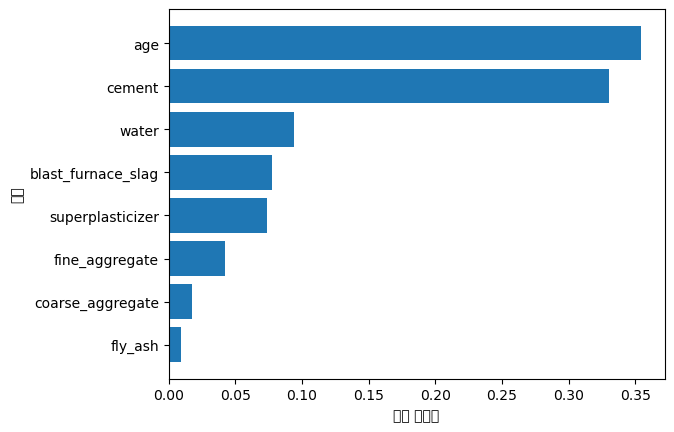

In [94]:
df_importance.sort_values("importance",ascending=True, inplace= True)
coordinates= range(len(df_importance))
plt.barh(y= coordinates, width= df_importance["importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")
plt.show()

#### 그랜디언트 부스팅을 돌리고 변수의 중요도를 확인해보았을 때, age와 cement가 0.3 이상으로 가장 설명력있는 변수이고, 그 뒤로 0.1 정도 되는 변수 water, blast_furnace_slag, superplasticizer가 존재합니다.

## 의사결정나무와 랜덤 포레스트, 그랜디언트 부스팅 3가지 모델을 돌려보았을 때 앙상블 모델인 랜덤포레스트와 그랜디언트 부스팅이 각각 88.6%, 89.3%로 76%인 의사결정나무 모델보다 성능이 좋게 나왔습니다. 가장 높은 성능은 그랜디언트 부스팅이므로 3가지 모델 중 최종모델을 선정한다면 그래디언트 부스팅을 선택할 것입니다. 